In [21]:
import pandas as pd
df = pd.read_csv("../data/sample_diabetes_data.csv")
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    100 non-null    int64  
 1   Glucose        100 non-null    int64  
 2   BloodPressure  100 non-null    int64  
 3   BMI            100 non-null    float64
 4   Age            100 non-null    int64  
 5   Outcome        100 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 4.8 KB


,Pregnancies,Glucose,BloodPressure,BMI,Age,Outcome
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4.910000,141.520000,85.430000,30.871000,46.420000,0.460000
std,2.871296,39.943769,18.741331,8.163856,13.498358,0.500908
min,0.000000,70.000000,51.000000,18.400000,22.000000,0.000000
25%,2.000000,107.750000,71.750000,23.200000,33.750000,0.000000
50%,5.000000,142.000000,82.000000,30.100000,45.500000,0.000000
75%,7.000000,174.000000,99.250000,37.400000,57.000000,1.000000
max,9.000000,199.000000,121.000000,44.500000,69.000000,1.000000


In [22]:
df.isnull().sum()


Pregnancies      0
Glucose          0
BloodPressure    0
BMI              0
Age              0
Outcome          0
dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

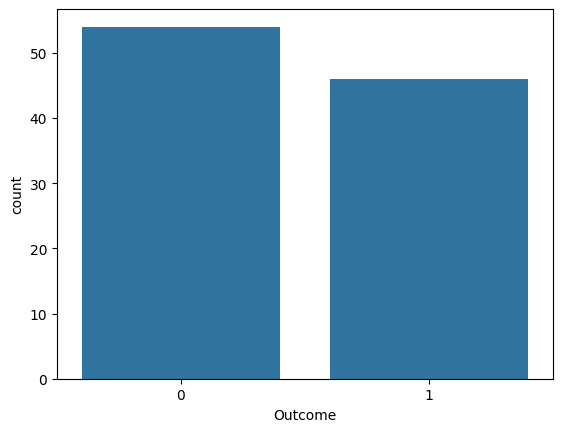

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Outcome", data=df)


In [24]:
from sklearn.preprocessing import StandardScaler

X = df.drop("Outcome", axis=1)
y = df["Outcome"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       0.57      0.50      0.53         8

    accuracy                           0.65        20
   macro avg       0.63      0.62      0.63        20
weighted avg       0.64      0.65      0.65        20

--- Decision Tree ---
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        12
           1       0.57      1.00      0.73         8

    accuracy                           0.70        20
   macro avg       0.79      0.75      0.70        20
weighted avg       0.83      0.70      0.69        20

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.60      0.75      0.67         8

    accuracy                           0.70        20
   macro avg       0.70      0.71      0.70        20
we

In [26]:
import joblib
joblib.dump(models["Random Forest"], "../app/model.pkl")
joblib.dump(scaler, "../app/scaler.pkl")


['../app/scaler.pkl']